# Activity 02: CSE Demographics

## Overview

To analyze the demographics of Notre Dame students in the Computer Science and Engineering Department, this activity downloads and transforms the data for the class of 2013 through 2020. With Python, the data is fetched, stored in a dictionary, and used to generate two plots: a bar graph with the gender breakdown and a stack plot with the ethnic breakdown of the students. By analyzing these graphs, the underrepresentation of women and ethnic minorities in the department becomes apparent. Ultimately, these visuals present a problem which must be addressed both within the university and society as a whole.

## Methodology

The main implementation fetches the demographic data on students in the Computer Science and Engineering Department. The first line of the text is separated and stored as a list containing the given years. Then, a dictionary is created with each year as a key and the value for each year as a dictionary which stores and counts the demographic data. A for loop is used to iterate through each line in the remaining data. Each line is separated into a list of letters. Another for loop iterates through the list and adds each letter representing gender and ethnicity to the dictionary with the appropriate year as the key. Finally, after creating the dictionary, one function plots the gender data as a bar graph, and another plots the ethnicity data as a stack plot.

In [1]:
%matplotlib inline

#### Function: Plot Gender Breakdown

In [2]:
import matplotlib.pyplot as plt

def plot_gender_pct(data):
    # Calculate percentage of female and male students for each year
    fig, ax = plt.subplots(1,1, figsize=(10, 8))
    years = sorted(data.keys())
    males = []
    females = []
    for year in years:
        m = data[year]['M']
        f = data[year]['F']
        t = m + f
        males.append(m * 100.0 / t)
        females.append(f * 100.0 / t)
    # Display results
    ax.bar(years, females, color='r', label='Female')
    ax.bar(years, males, bottom=females, color='b', label='Male')
    plt.title('Notre Dame Computer Science and Engineering Students')
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

#### Function: Plot Ethnicity Breakdown

In [3]:
import matplotlib.pyplot as plt

def plot_ethnicity_pct(data):
    # Calculate percentage of students by ethnicity for each year
    fig, ax = plt.subplots(1,1, figsize=(10, 8))
    years = sorted(data.keys())
    caucasian = []
    asian = []
    hispanic = []
    black = []
    native = []
    multiple = []
    undeclared = []  
    for year in years:
        c = data[year]['C']
        o = data[year]['O']
        s = data[year]['S']
        b = data[year]['B']
        n = data[year]['N']
        t = data[year]['T']
        u = data[year]['U']
        total = c + o + s + b + n + t + u
        caucasian.append(c * 100.0 / total)
        asian.append(o * 100.0 / total)
        hispanic.append(s * 100.0 / total)
        black.append(b * 100.0 / total)
        native.append(n * 100.0 / total)
        multiple.append(t * 100.0 / total)
        undeclared.append(u * 100.0 / total)
    # Display results
    labels = ['Caucasian','Asian','Hispanic','Black','Native','Multiple','Undeclared']
    ax.stackplot(years, caucasian, asian, hispanic, black, native, multiple, undeclared, labels=labels)
    plt.title('Notre Dame Computer Science and Engineering Students')
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

#### Main Implementation

In [9]:
# Imports
import collections
import requests

# Fetch demographic data
url = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/demographics.csv'
data = requests.get(url)

# Return if unable to fetch data
while data.status_code != 200:
    data = requests.get(url)

# Extract years from the header line
lines = data.text.splitlines()
years = lines[0][:-1].split(',,')

# Create dictionary with years and data for each year
data = {}
for year in years:
    data[year] = { 
    'M' : 0, 'F' : 0,
    'C' : 0, 'O' : 0, 'S' : 0, 'B' : 0, 'N' : 0, 'T' : 0, 'U' : 0
    }

# Extract data corresponding to each year (ie. remaining lines)
for line in lines[1:]:
    line = line.split(',')
    for index in range(0,len(years)):
        gender = line[2 * index]
        ethnicity = line[2 * index + 1]
        year = years[index]
        if gender:
            data[year][gender] += 1
        if ethnicity:
            data[year][ethnicity] += 1

## Analysis

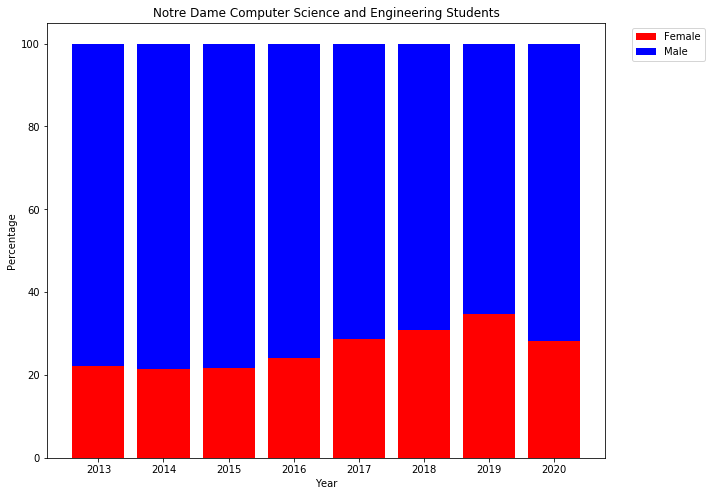

In [12]:
plot_gender_pct(data)

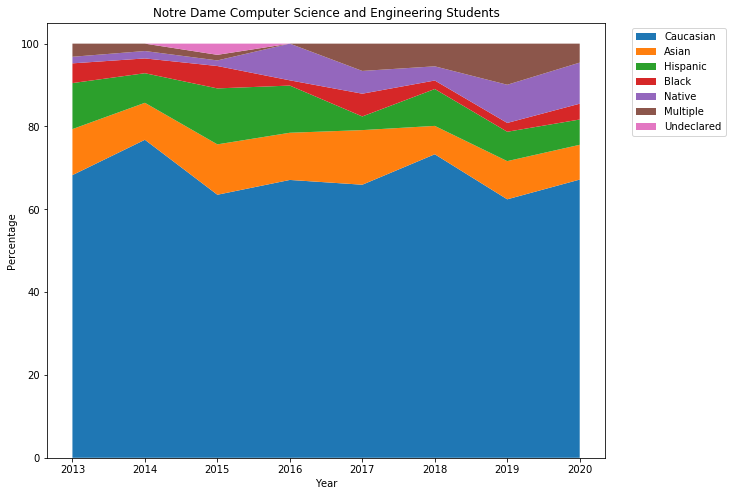

In [11]:
plot_ethnicity_pct(data)

The generation of the graphs above allows one to visualize the gender and ethnic breakdown for students in computer science and engineering at Notre Dame. The gender breakdown reveals that only about 20 to 30 percent of the students are female. However, the bar graph suggests an overall postive trend as the percentage of females in computer science rises each year. Furthermore, the past eight computer science and engineering classes have been dominated by white students. The Notre Dame student body is approximately 70 percent white so this result is unsurprising. Note, the ethnic breakdown has remained fairly consistent in the past seven years.

## Discussion

As a woman in computer science at Notre Dame, I am quite aware of the lack of gender diversity in the field. I believe the Computer Science and Engineering Department welcomes and supports each student, regardless of one's gender. However, the statistics reveal a greater problem; women do not enter the field at all. Computer science is an important, expansive field which continues to grow each year, and I know many women have the ability to contribute. Because of this, I believe tech industries and university departments should make an effort to expose young girls to computer science. If I had never been exposed to MATLAB in Introduction to Engineering, I never would have known how much I love coding. I believe introducing girls to the concept of coding and the possibility of working the tech industry would improve female representation. Then, the welcoming and supportive environment which I have experienced thus far must be maintained. While the ethnic demographic breakdown presents additional problems, I believe the demographic of the entire Notre Dame student body presents an insurmountable obstacle. Until Notre Dame improved diversity in all aspects, the underrepresentation will continue.